<a href="https://colab.research.google.com/github/lopezns/MachineLearning/blob/main/R2-A4-S4%20Regresi%C3%B3n%20Lineal/EjercicioRegresionLineal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

R^2 Score: 0.4209526628914978
Coeficient: -0.03887591053949169
Intercept: 40.67437818459049


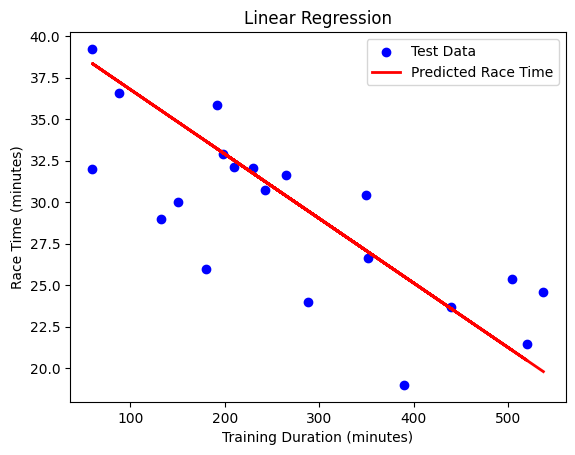

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


training_duration_orig = np.array([60, 240, 120, 360, 180, 300, 420, 480, 540, 210, 150, 450, 390, 270, 330, 90, 510, 570, 132, 312, 228, 432, 288, 408, 588])
race_time_orig = np.array([32, 24, 28, 20, 26, 22, 18, 15, 14, 27, 30, 16, 19, 25, 23, 31, 14, 13, 29, 21, 28, 17, 24, 22, 12])


def generate_random_data(n_samples=75, seed=42):
    np.random.seed(seed)


    training_duration = np.random.normal(loc=300, scale=150, size=n_samples)
    training_duration = np.clip(training_duration, 60, 600)

    coef = -0.03
    intercept = 40
    race_time = coef * training_duration + intercept + np.random.normal(scale=2, size=n_samples)

    return training_duration, race_time


training_duration_rand, race_time_rand = generate_random_data(n_samples=75)

training_duration = np.concatenate((training_duration_orig, training_duration_rand))
race_time = np.concatenate((race_time_orig, race_time_rand))


x = training_duration.reshape(-1, 1)
y = race_time


x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


model = LinearRegression()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

r2 = model.score(x_test, y_test)
print("R^2 Score:", r2)
coeficient = model.coef_[0]
print("Coeficient:", coeficient)
intercept = model.intercept_
print("Intercept:", intercept)


plt.scatter(x_test, y_test, color='blue', label='Test Data')
plt.plot(x_test, y_pred, color='red', linestyle='-', linewidth=2, label='Predicted Race Time')
plt.xlabel('Training Duration (minutes)')
plt.ylabel('Race Time (minutes)')
plt.title('Linear Regression')
plt.legend()
plt.show()
